In [9]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (12 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp39-cp39-macosx_12_0_arm64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = '../output_video/cropped_img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

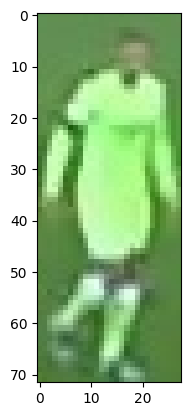

In [5]:
plt.imshow(image)

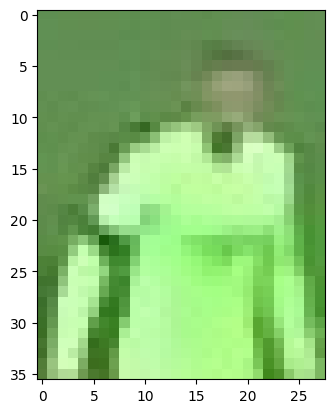

In [7]:
top_half_image = image[0:int(image.shape[0]/2),:]
plt.imshow(top_half_image)

## Cluster the image into the two clusters

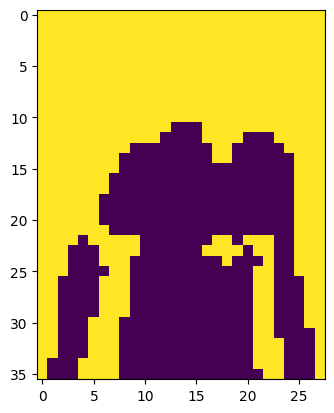

In [11]:
# Reshape image into 2d array
image_2d = top_half_image.reshape(-1, 3)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(image_2d)

labels = kmeans.labels_

clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_image)
plt.show()

In [12]:
corner_clusters = [clustered_image[0,0], clustered_image[-1,0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [13]:
player_cluster = 1 - non_player_cluster
player_cluster

0

In [14]:
kmeans.cluster_centers_[player_cluster]

array([175.93990385, 244.94230769, 150.70432692])